## Visualize Results: Model Comparison

In [ ]:
import json

with open("../data/all_results.json", "r") as json_file:
    all_results = json.load(json_file)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define consistent colors for each model
MODEL_COLORS = {
    'small_model': 'blue',
    'full_model': 'green',
    'full_model_texts': 'red'
}

In [ ]:
def plot_accuracy_comparison(all_results):
    labels = ['All Labels', 'All Labels (Excl. NA)', 'Two Labels', 'Two Labels (Excl. NA)']
    model_names = list(all_results.keys())

    data = {
        model: [
            all_results[model]['all_labels']['accuracy'],
            all_results[model]['all_labels_exclude_not_available']['accuracy'],
            all_results[model]['two_labels']['accuracy'],
            all_results[model]['two_labels_exclude_not_available']['accuracy']
        ] for model in model_names
    }

    x = np.arange(len(labels))
    bar_width = 0.25

    plt.figure(figsize=(10, 6))

    for i, model in enumerate(model_names):
        plt.bar(x + i * bar_width, data[model], bar_width, label=model, color=MODEL_COLORS[model])

    plt.xticks(x + bar_width, labels)
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison Across Labels')
    plt.legend()
    plt.show()

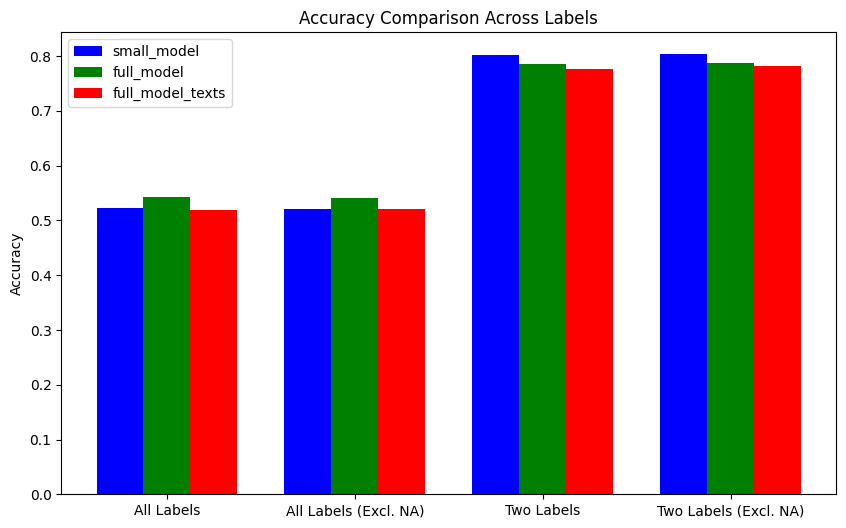

In [ ]:
plot_accuracy_comparison(all_results)

In [ ]:
import matplotlib.colors as mcolors

def adjust_color(color, factor):
    """ Adjusts a color brightness by a given factor. Factor > 1 lightens, factor < 1 darkens. """
    rgb = mcolors.to_rgb(color)
    adjusted_rgb = tuple(min(max(c * factor, 0), 1) for c in rgb)
    return mcolors.to_hex(adjusted_rgb)

def plot_false_predictions_by_type(all_results):
    labels = ['unsubstantiate', 'partially substantiate', 'fully substantiate']
    model_names = list(all_results.keys())

    # Define color variations
    model_color_variants = {
        model: {
            'unsubstantiate': MODEL_COLORS[model],  # Base color but transparent
            'partially substantiate': MODEL_COLORS[model],  # Base color (full opacity)
            'fully substantiate': adjust_color(MODEL_COLORS[model], 0.5)  # 50% darker
        }
        for model in model_names
    }

    misclassification_data = {model: {label: {} for label in labels} for model in model_names}

    for model in model_names:
        false_predictions = all_results[model]['all_labels']['type_false_predictions']
        for label in labels:
            misclassification_data[model][label] = false_predictions.get(label, {})

    x = np.arange(len(labels))
    bar_width = 0.25

    plt.figure(figsize=(12, 6))

    for i, model in enumerate(model_names):
        bottom_values = np.zeros(len(labels))  # Stack bars on top of each other
        for misclassified_as in labels:
            values = [misclassification_data[model][label].get(misclassified_as, 0) for label in labels]
            plt.bar(
                x + i * bar_width,
                values,
                bar_width,
                bottom=bottom_values,
                label=f"{model}: {misclassified_as}",
                color=model_color_variants[model][misclassified_as],
                alpha=0.4 if misclassified_as == 'unsubstantiate' else 1.0  # Transparency only for "unsubstantiate"
            )
            bottom_values += np.array(values)

    plt.xticks(x + bar_width, labels)
    plt.xlabel('Target Label')
    plt.ylabel('Number False Predictions')
    plt.ylim(0, max(bottom_values) * 1.3)
    plt.title('False Predictions Breakdown by Type (All labels, including NA)')
    plt.legend()
    plt.show()


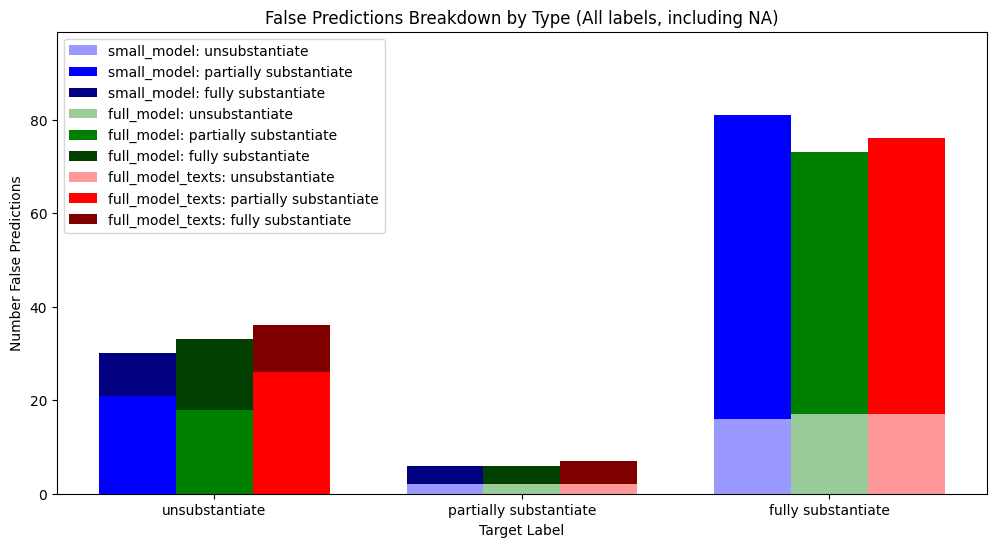

In [ ]:
plot_false_predictions_by_type(all_results)

In [ ]:
def plot_false_positives_vs_negatives(all_results):
    labels = ['Correct Predictions', 'False Positives', 'False Negatives']
    model_names = list(all_results.keys())

    data = {
        model: [
            all_results[model]['two_labels']['correct'],  # Added correct predictions
            all_results[model]['two_labels']['false_positives'],
            all_results[model]['two_labels']['false_negatives']
        ] for model in model_names
    }

    x = np.arange(len(labels))
    bar_width = 0.25

    plt.figure(figsize=(8, 5))

    for i, model in enumerate(model_names):
        plt.bar(x + i * bar_width, data[model], bar_width, label=model, color=MODEL_COLORS[model])

    plt.xticks(x + bar_width, labels)
    plt.ylabel('Count')
    plt.title('Two Labels: Correct Predictions vs. False Positives vs. False Negatives')
    plt.legend()
    plt.show()

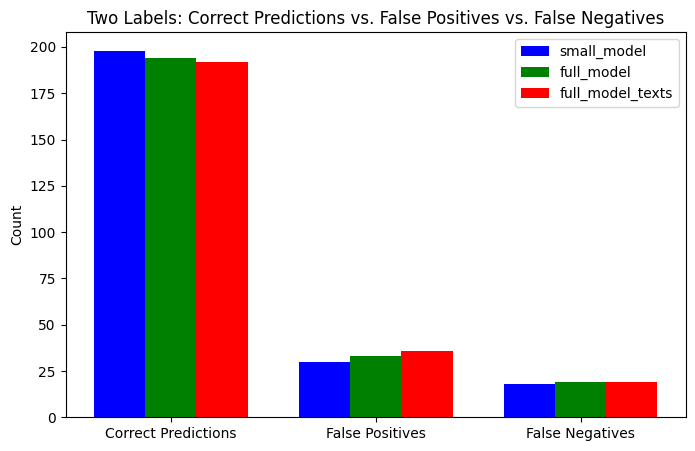

In [ ]:
plot_false_positives_vs_negatives(all_results)